# Explore Cell Cutoffs

We are unsatisfied with out current cutoffs for calling a cell vs background. We think cell ranger's cutoff is too arbitrary, so I need to import the unfiltered data and figure out our own filtering criteria.

**Note: Requires 64Gb of RAM to run this notebook.**

In [2]:
import os
import sys
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import tables

# Project level imports
sys.path.insert(0, '../lib')
from larval_gonad.notebook import Nb
from larval_gonad.plotting import make_figs
from larval_gonad.config import memory
from larval_gonad.io import cellranger_counts, cellranger_umi

# Setup notebook
nbconfig = Nb.setup_notebook()


last updated: 2018-03-20 
Git hash: c08af6a646e691e17b6633097ebb3f2fc1ba0ce4


## Get UMI info

In [3]:
fname = '../output/testis1_force/outs/molecule_info.h5'
umi = cellranger_umi(fname)

In [4]:
dat = umi.groupby("cell_id").umi.size().sort_values(ascending=False).to_frame()
dat['X'] = list(range(1, len(dat) + 1))

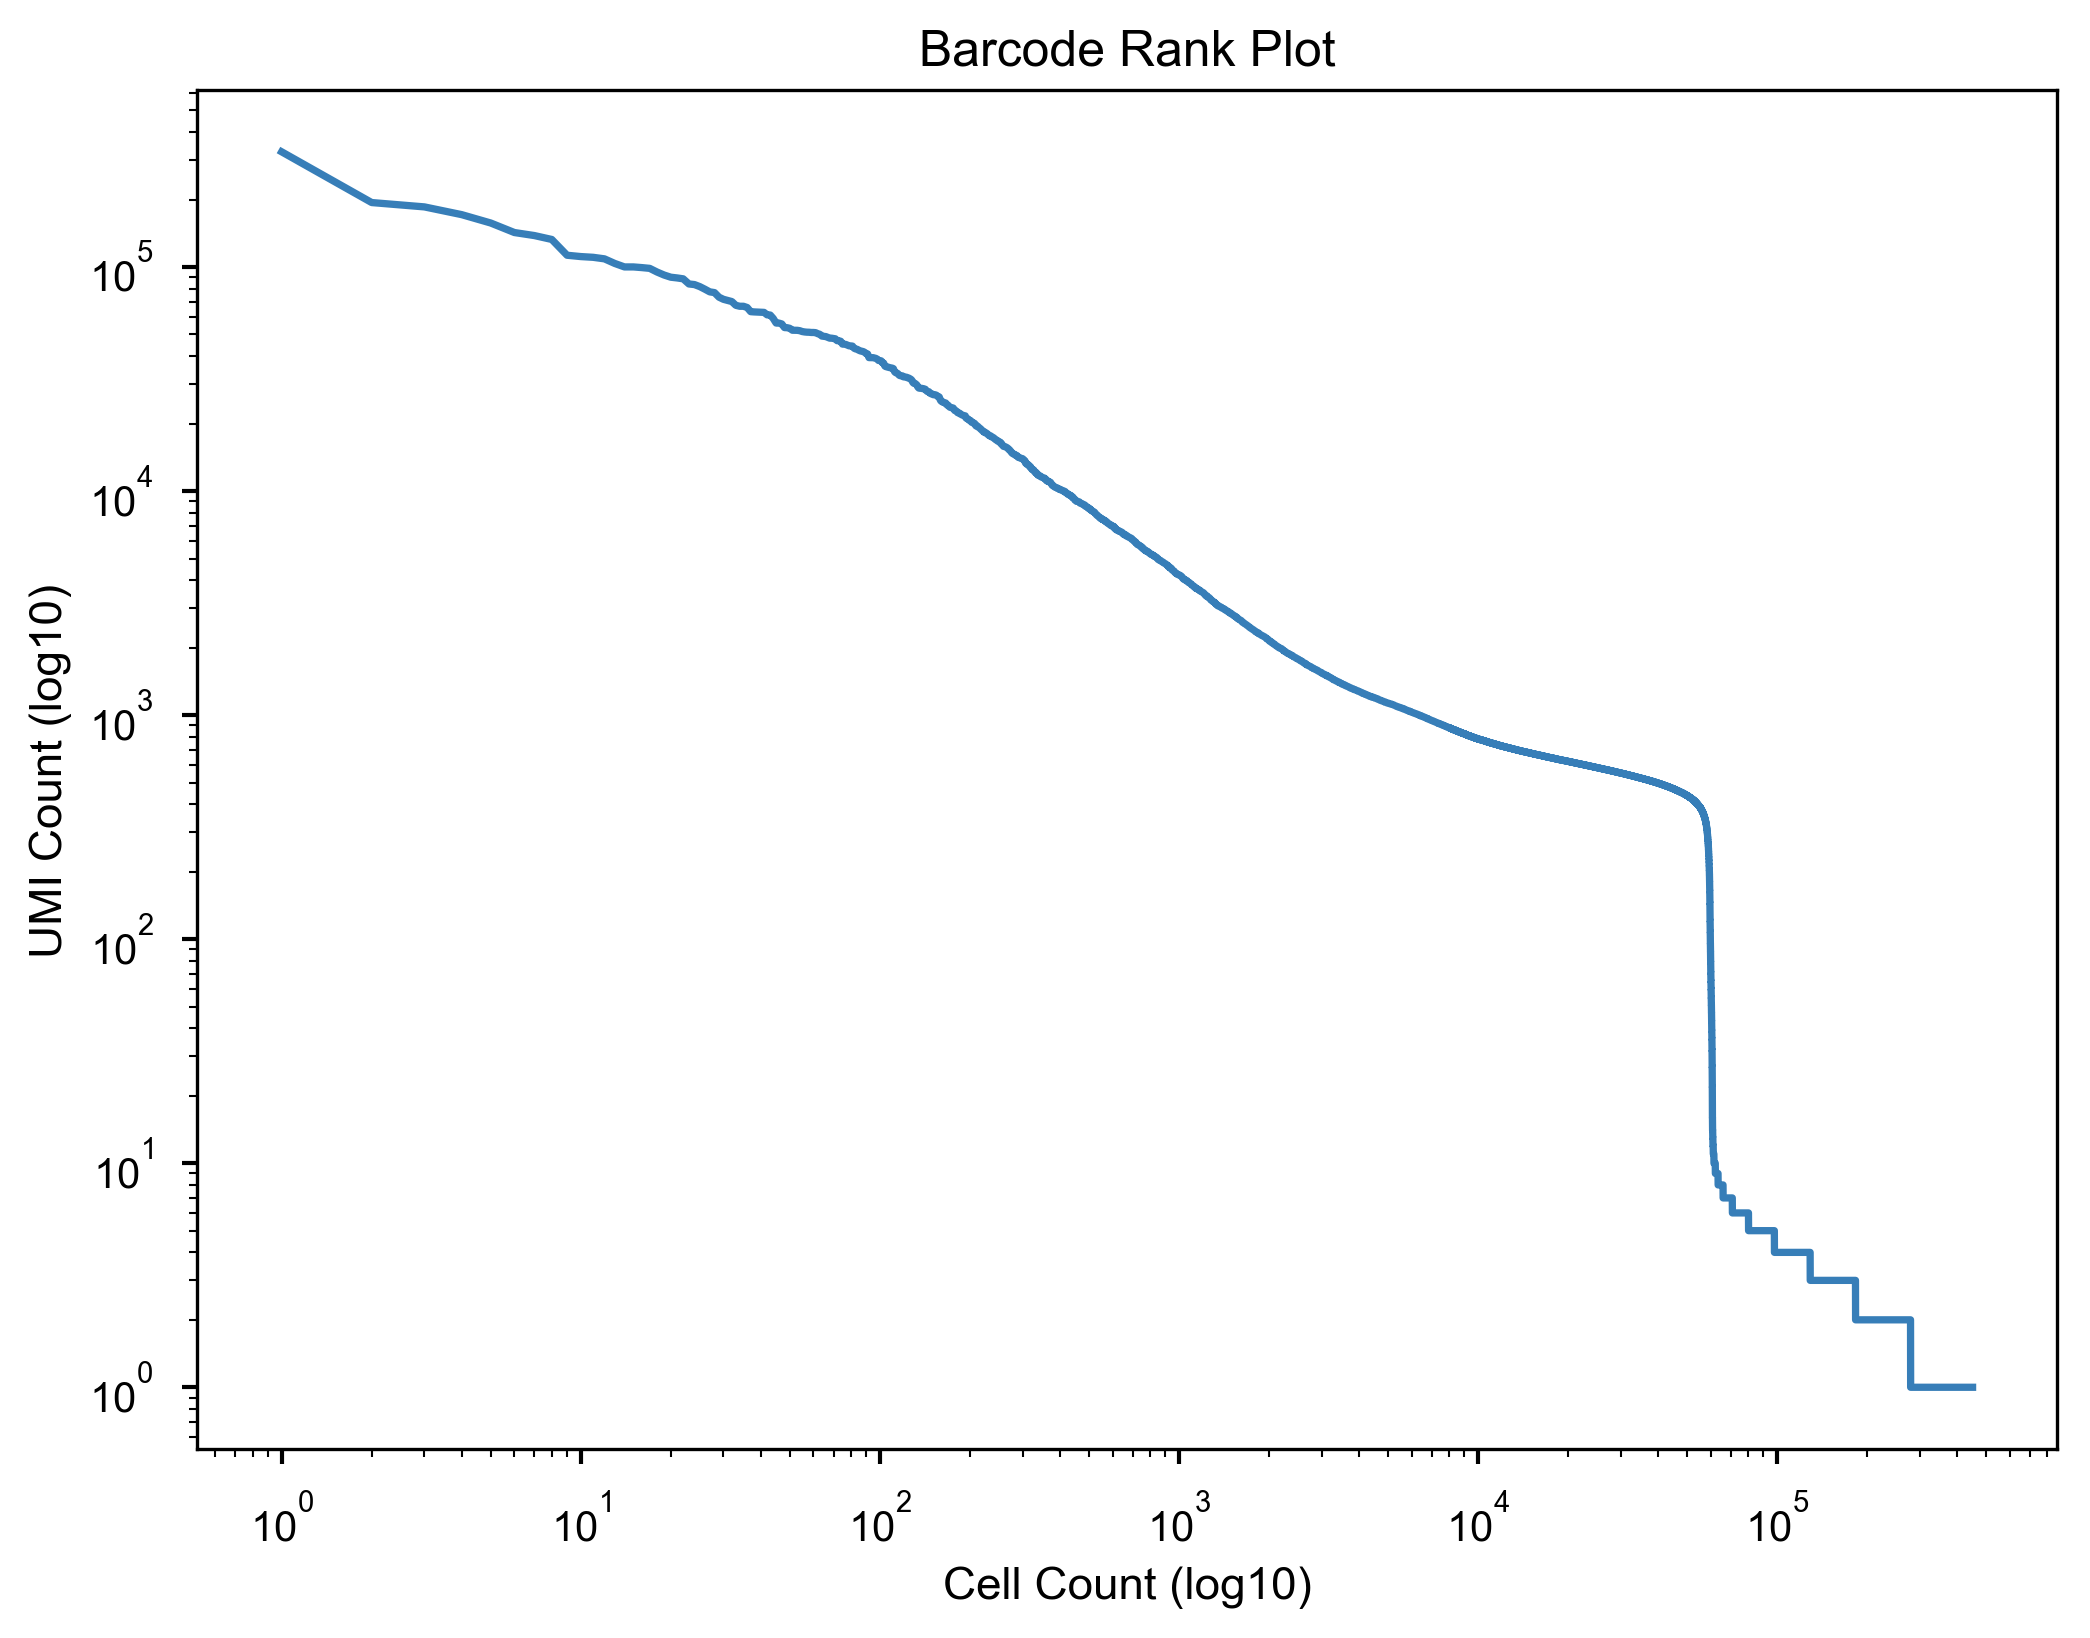

In [9]:
fig, ax = plt.subplots(1, 1)
ax.plot(dat['X'], dat['umi'])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Cell Count (log10)')
ax.set_ylabel('UMI Count (log10)')
ax.set_title('Barcode Rank Plot')
xlim = ax.get_xlim()
ylim = ax.get_xlim()

## Filter based on UMI Value

In [15]:
filtered = dat.query('umi > 1000')
cell_ids_enc = filtered.index.unique().tolist()
len(cell_ids_enc)

6353

(0.52158332325678569, 863380.74842606799)

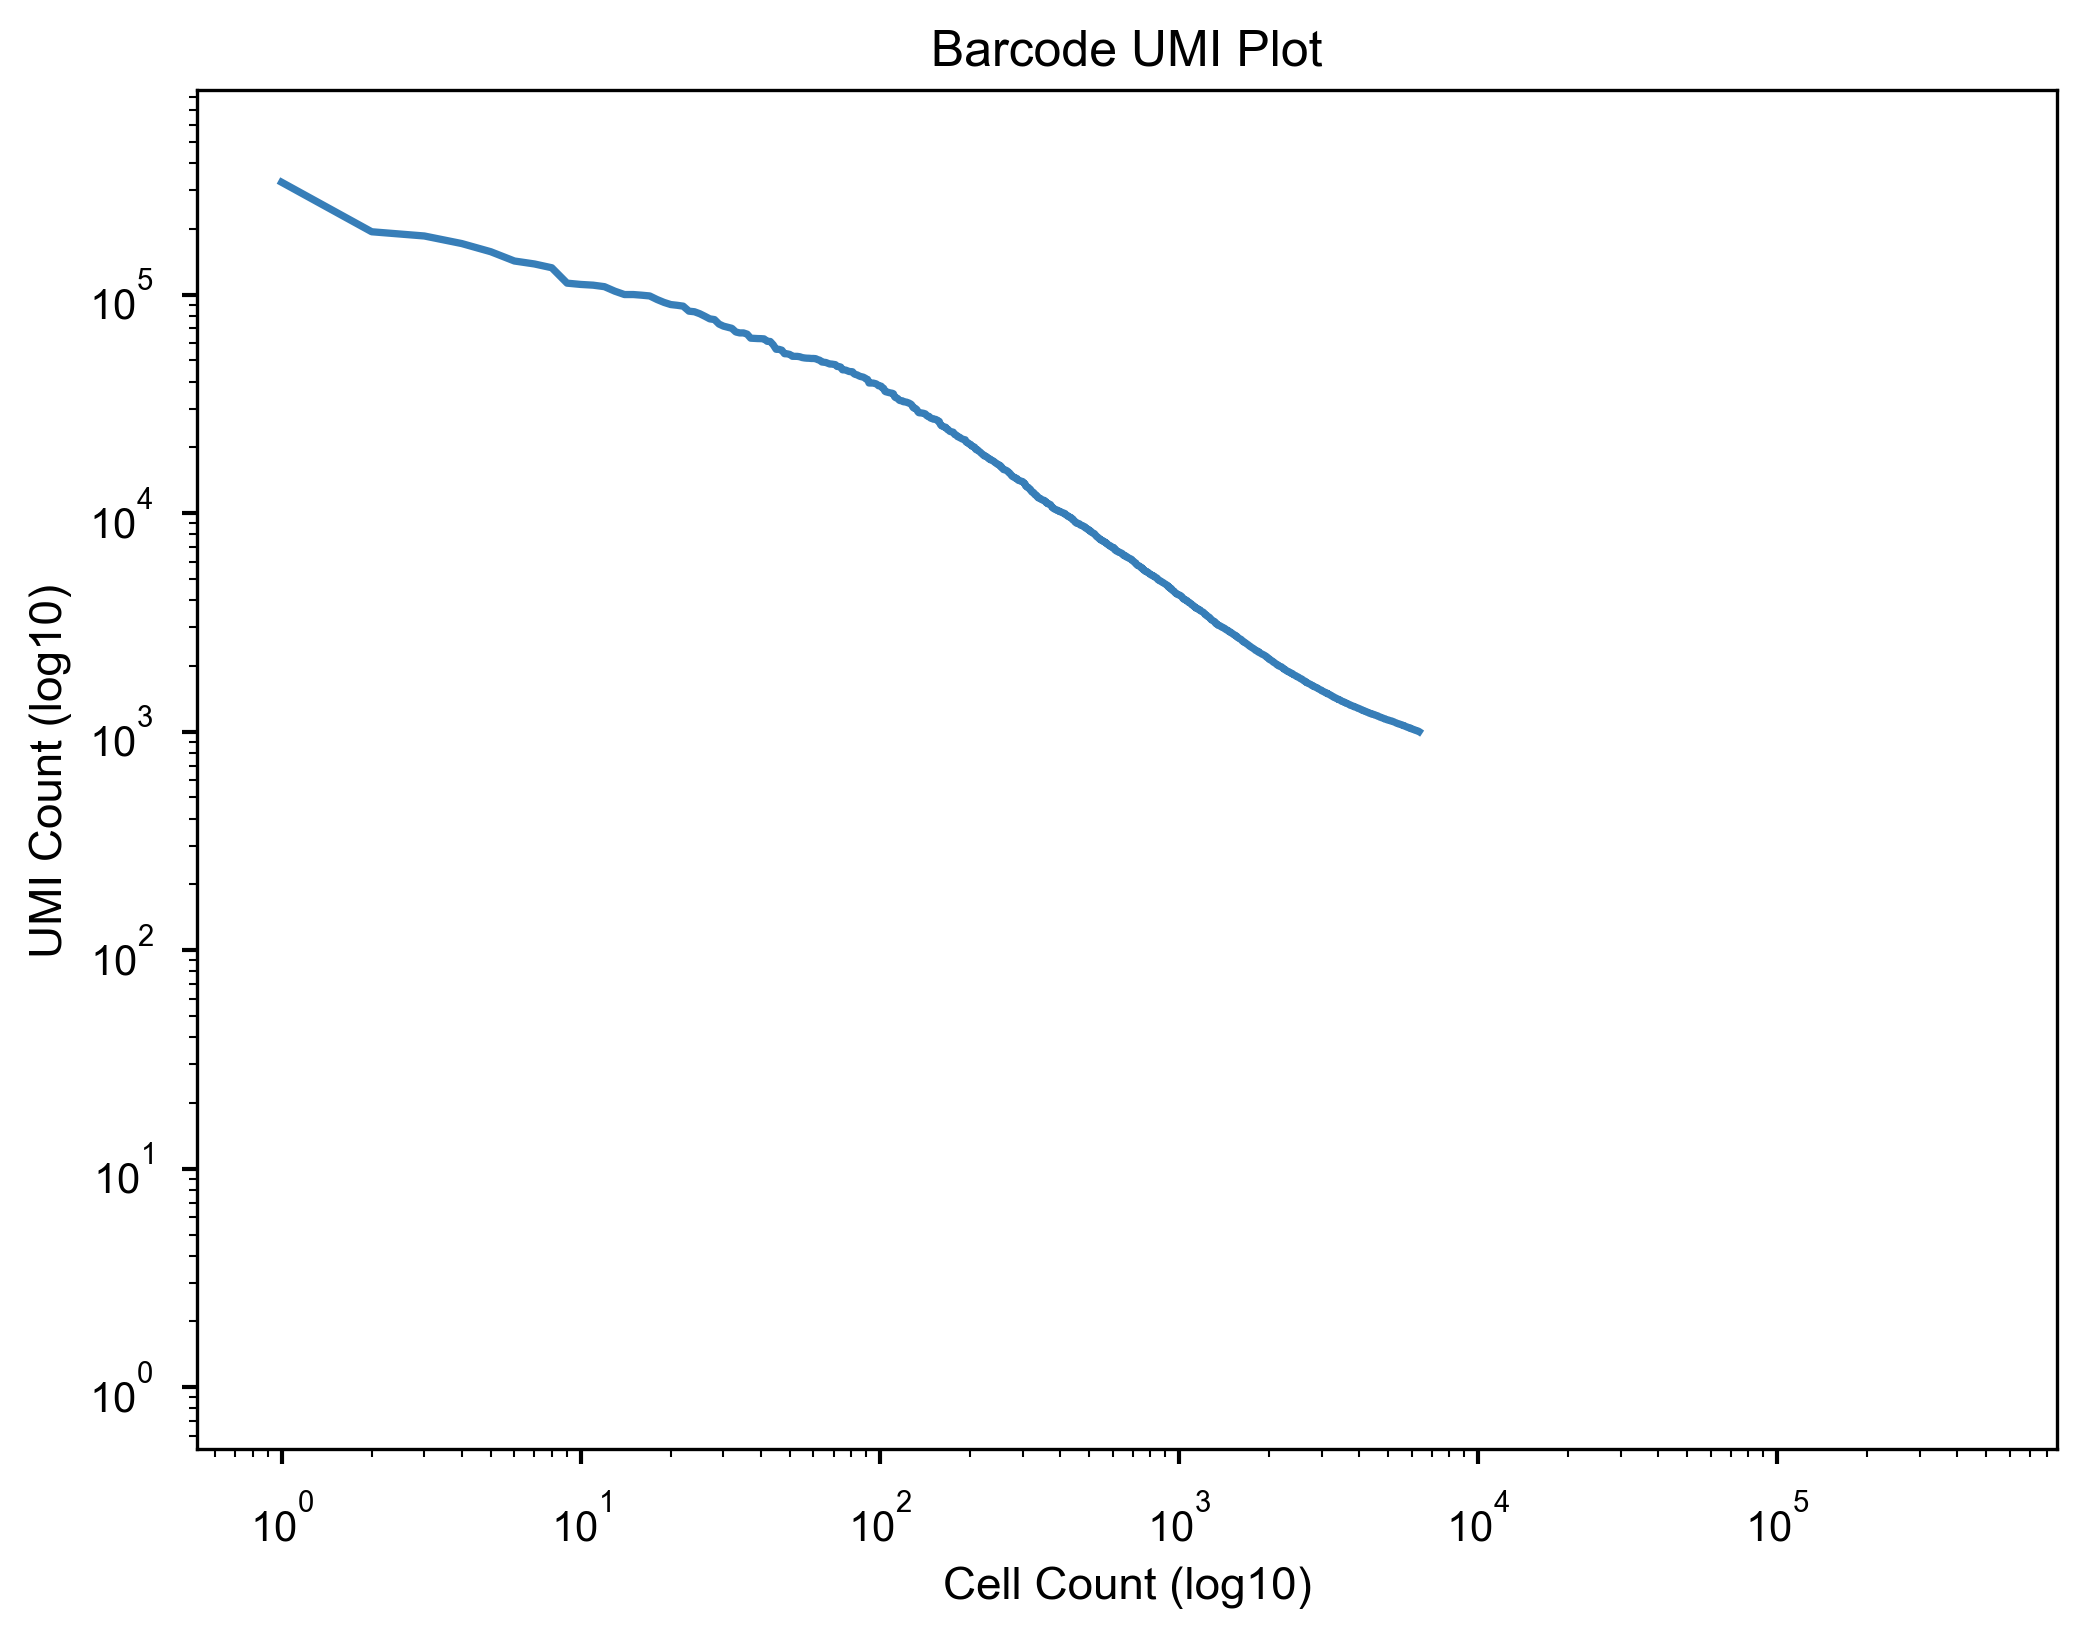

In [16]:
fig, ax = plt.subplots(1, 1)
ax.plot(filtered['X'], filtered['umi'])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Cell Count (log10)')
ax.set_ylabel('UMI Count (log10)')
ax.set_title('Barcode UMI Plot')
ax.set_xlim(xlim)
ax.set_ylim(ylim)

## Create filtered dataset

In [17]:
fname = '../output/testis1_force/outs/raw_gene_bc_matrices_h5.h5'
raw = cellranger_counts(fname, barcodes=cell_ids_enc)

In [18]:
raw.shape

(17473, 6353)

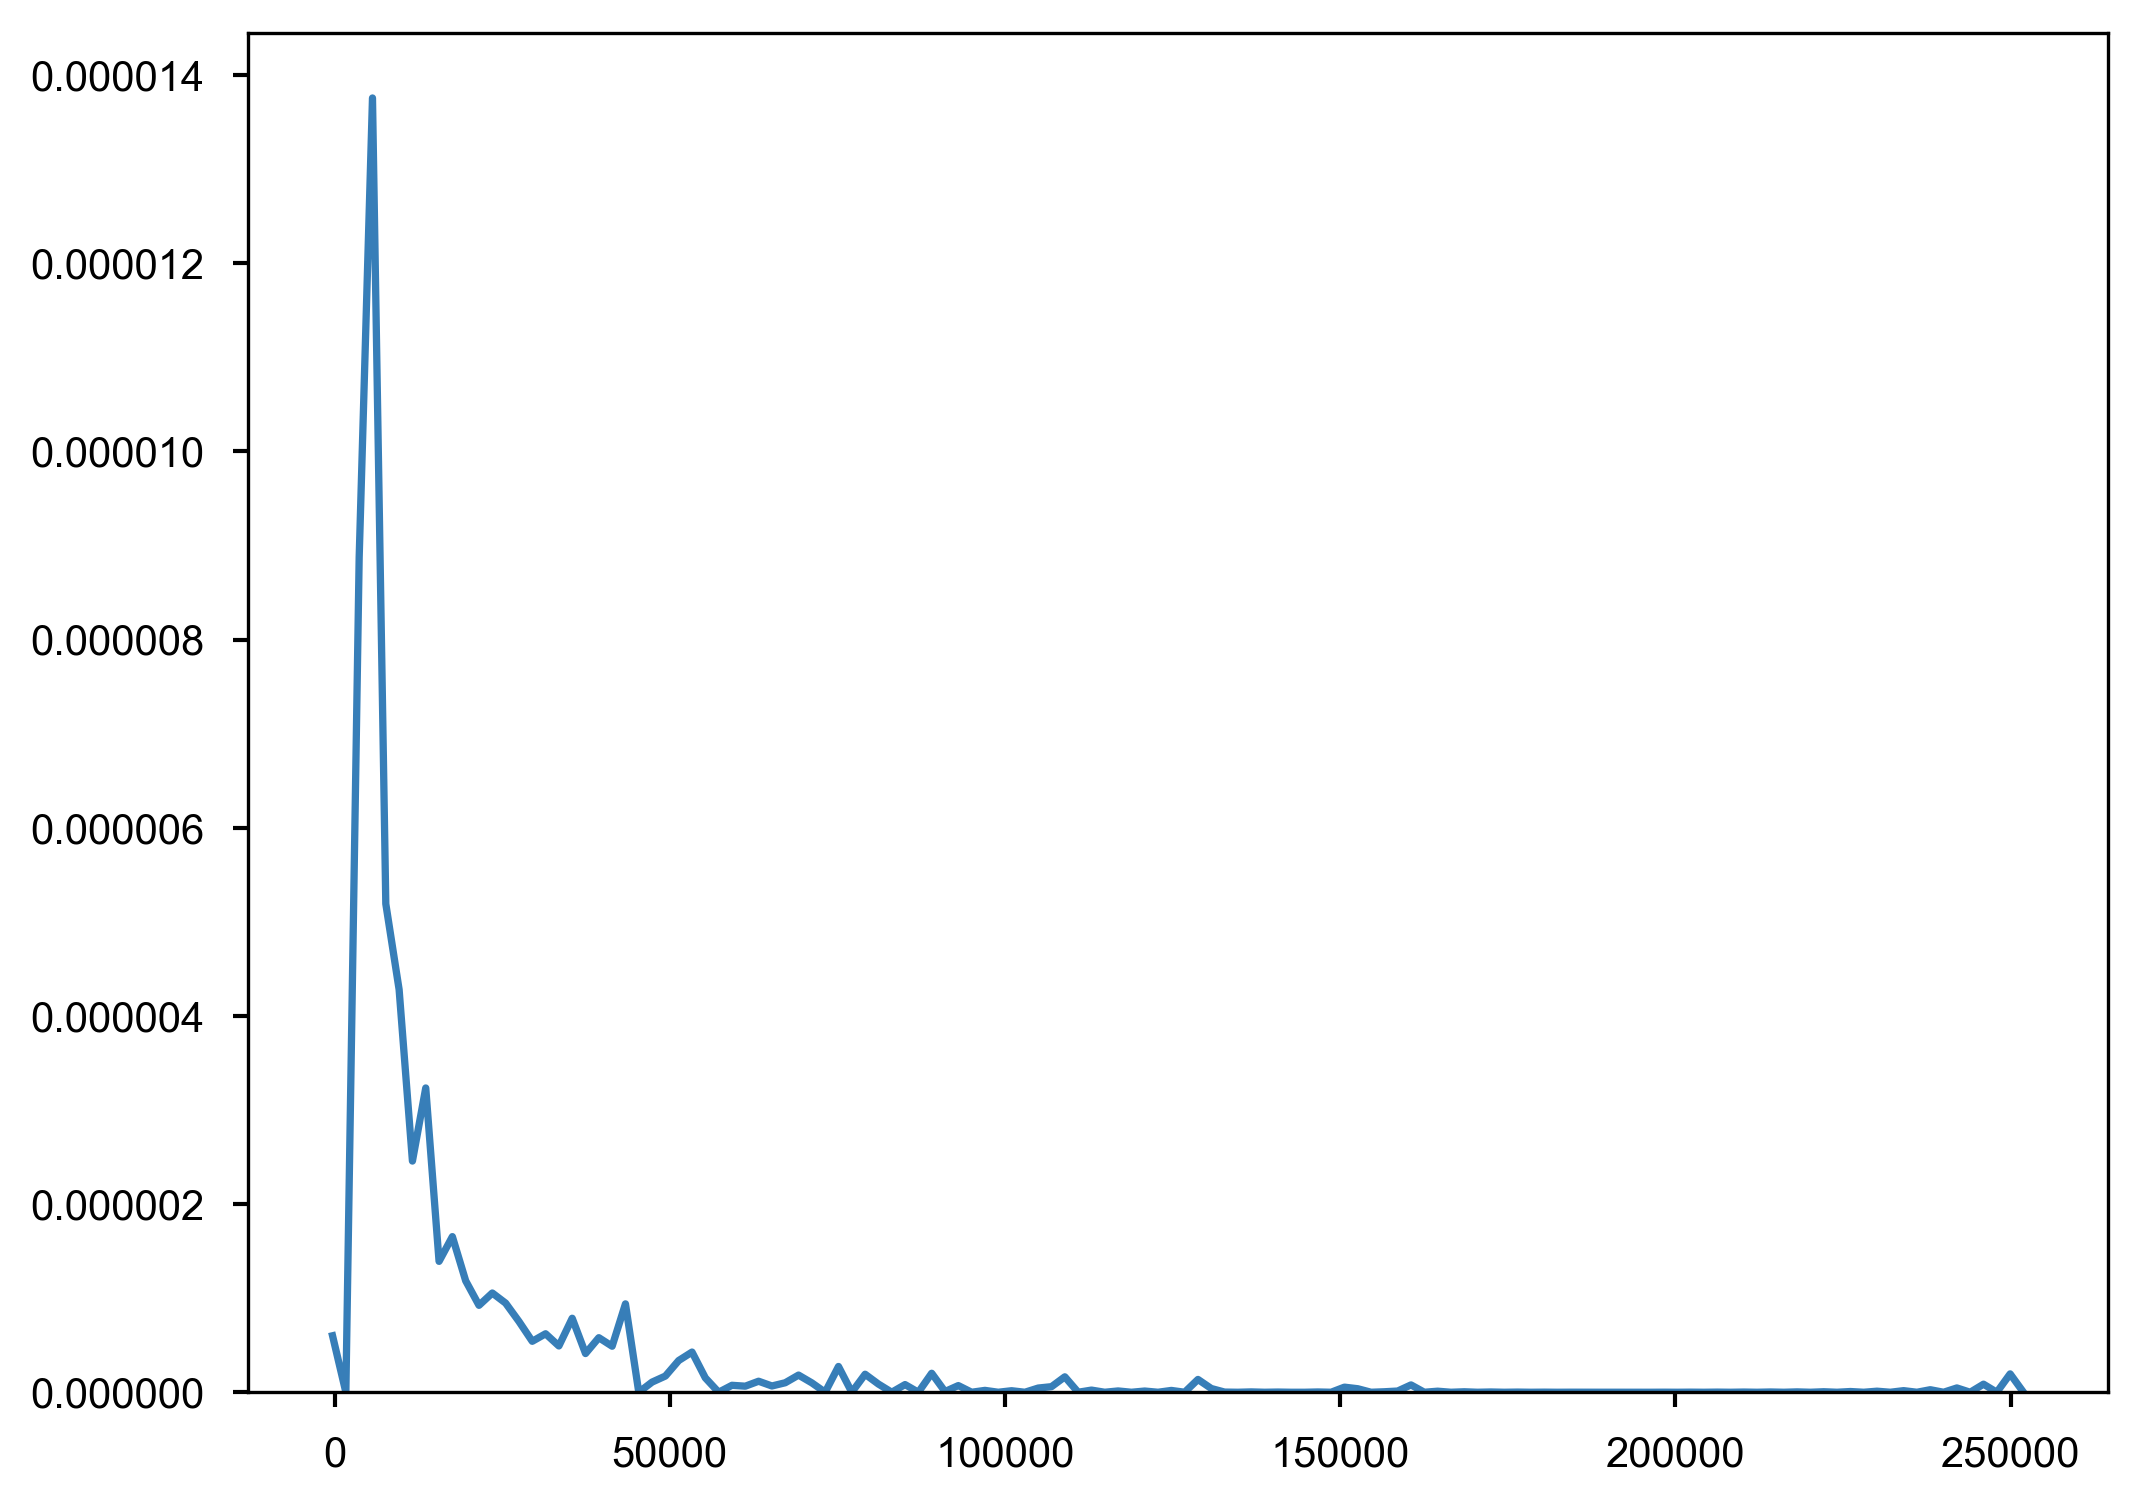

In [19]:
sns.kdeplot(raw.sum())

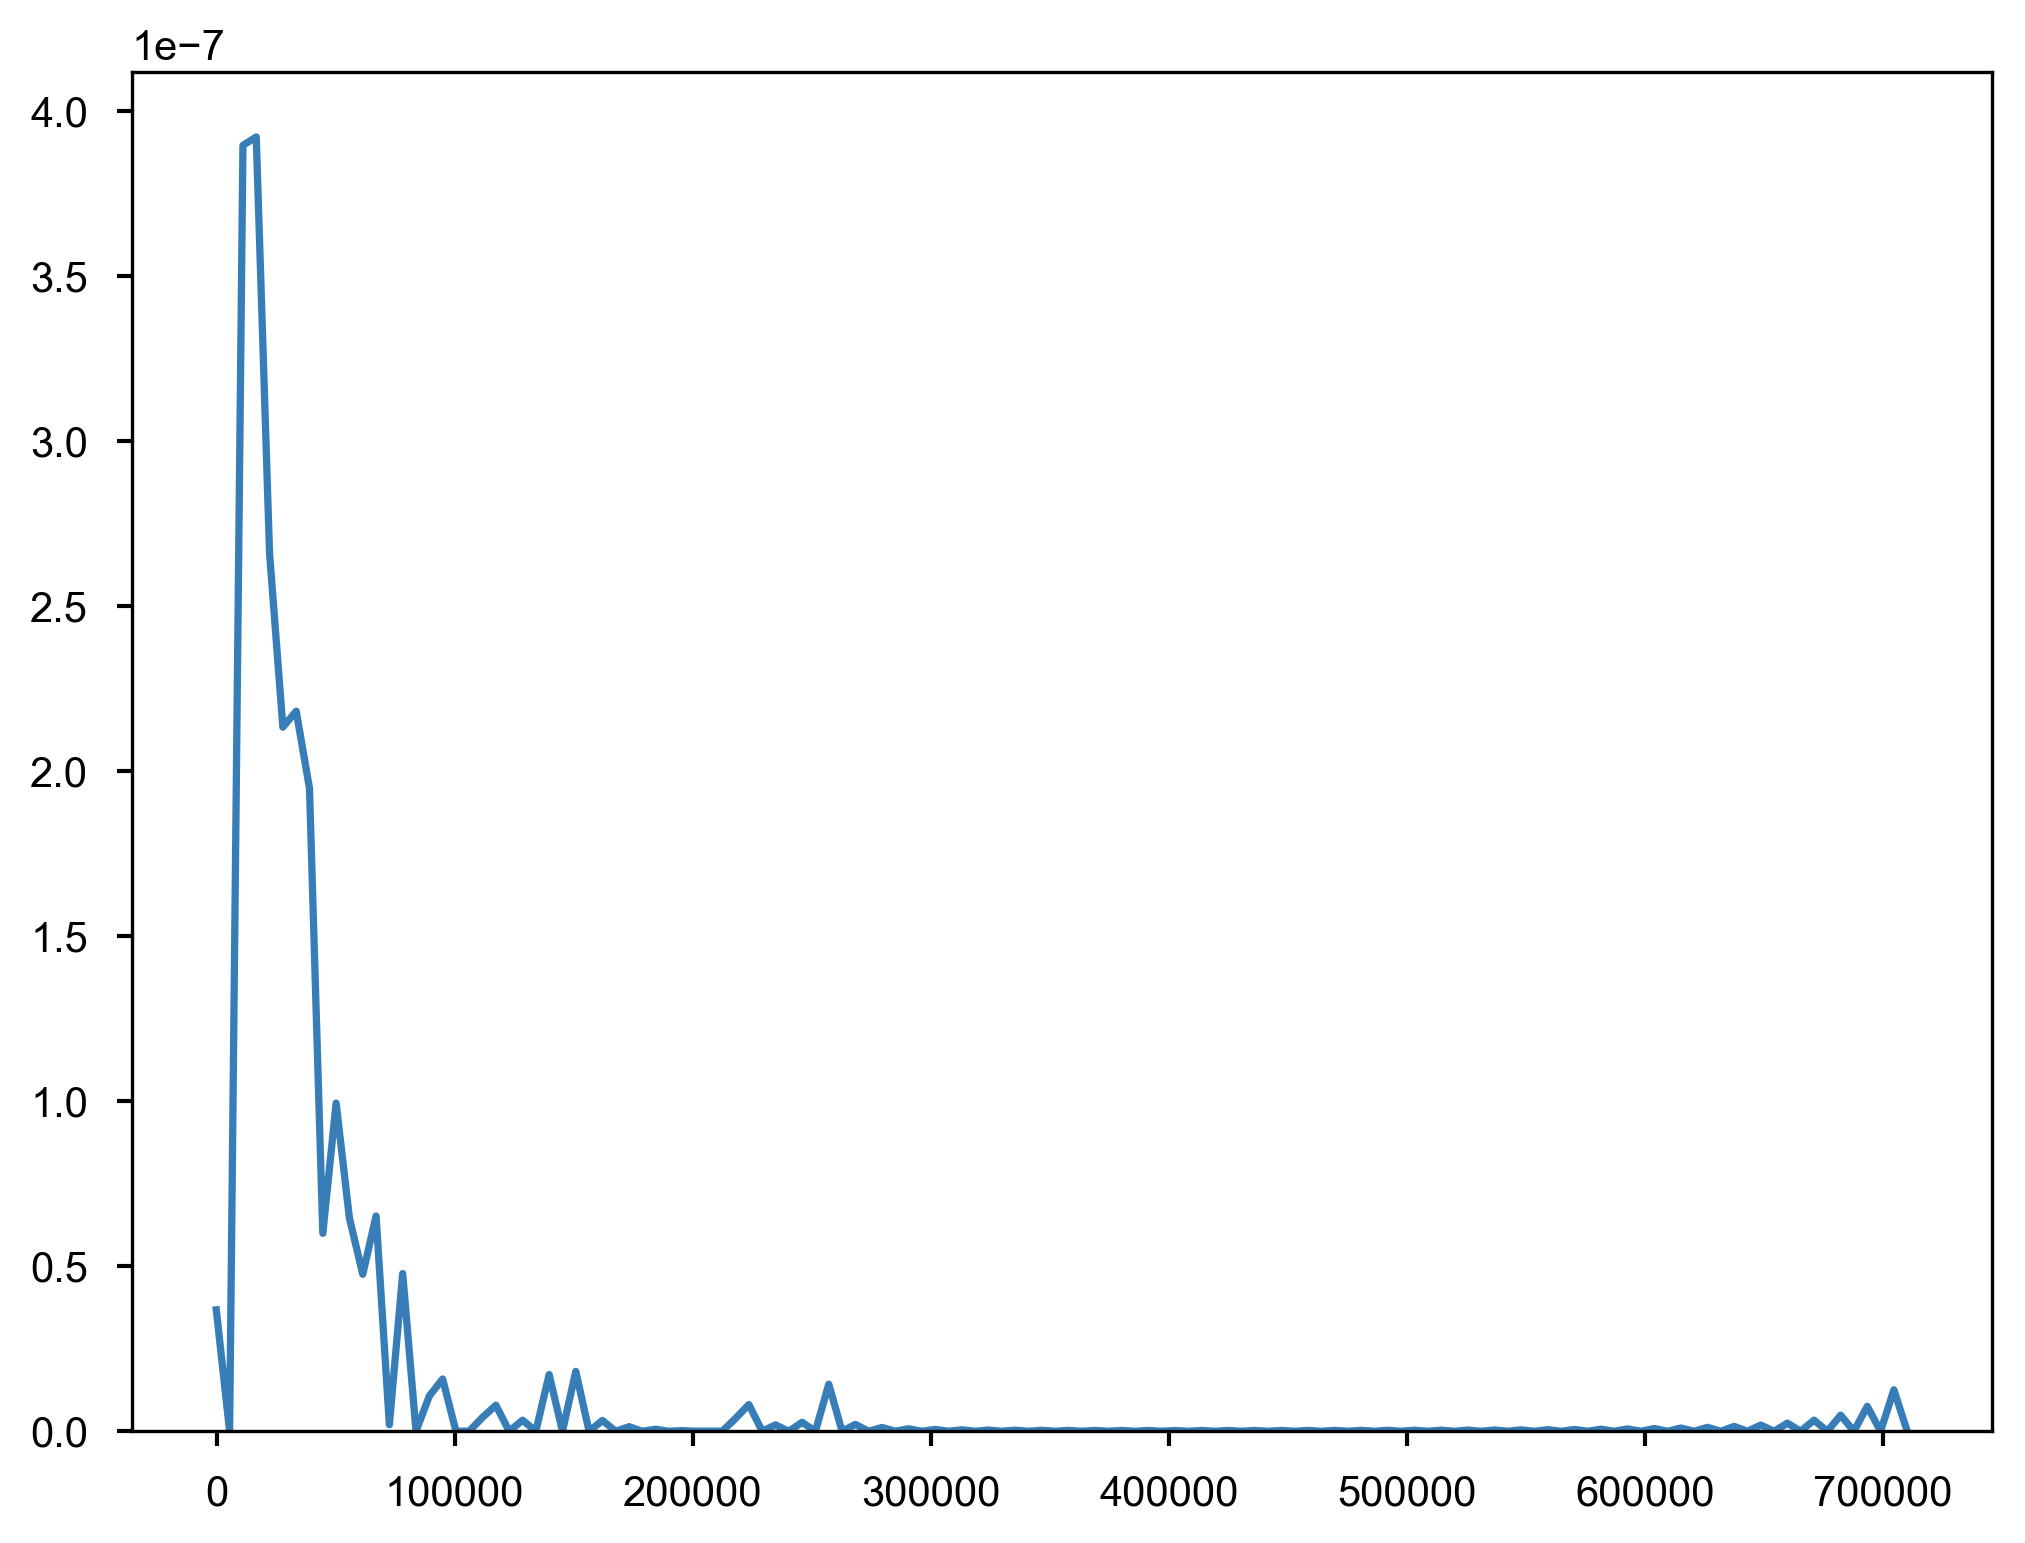

In [20]:
sns.kdeplot(raw.sum(axis=1))

In [23]:
raw.to_csv('../output/testis1_force/raw_umi_filtered.tsv', sep='\t')